## Bank Loan Application Case Study

In this case study I am going to analyse two bank data set on loan application. One file consist of present status of clients whether a client become defaulter or not. Another file consist of their previous history of loan status like APPROVED OR REFUSE OR CANCELLED OR UNSUED. I am going to do this analysis by applying various EDA techniques.

### Problem Statement
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.options.display.max_columns = 150
app_data = pd.read_csv(r'D:\Download folder\EDA case Study\application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


As it is seen that the entry are huge against rows and columns, so that the info function does not return the brief information of the data. Lets try to find the missing values column wise, so that we can treat that column and also minimize the dataset for better understanding for the analysis.

In [6]:
miss_value = app_data.isnull().sum()/len(app_data)*100
miss_value.sort_values(ascending=False).head(55)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

It is seen from the above that lots of columns have missing value percentage more than 30%.Imputing this huge amount of value is not a good idea for analysis.So better to drop these colums.

In [7]:
# Remove 50 colums which have missing values more than 30%

missing_value = app_data.isnull().sum()
missing_value = missing_value.sort_values(ascending= False).head(50)
app_data.drop(labels=missing_value.index, axis=1, inplace=True)
app_data.shape

(307511, 72)

In [8]:
# Remove some unwanted columns which does'nt have importance for analysis.

unwanted_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','NAME_TYPE_SUITE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
             'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
app_data.drop(labels=unwanted_col, axis=1, inplace=True)

In [9]:
app_data.shape

(307511, 35)

In [10]:
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,MONDAY,16,0,0,0,0,1,1,Other,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,THURSDAY,8,0,0,0,0,0,0,Electricity,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_

After analysis and treating these high percentage of missing values, as we can see that there are still some columns exist which have missing values more than 13%. instead of imputing these values its better to drop those columns as these columns are not so important for our risk analysis for providing loans.

In [12]:
# Removing columns which have missing values more than 13%

drop_col = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
app_data.drop(labels= drop_col, axis=1, inplace=True)

In [13]:
round(100*(app_data.isnull().sum()/len(app_data.index)), 4)

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0039
AMT_GOODS_PRICE                0.0904
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
REGION_POPULATION_RELATIVE     0.0000
DAYS_BIRTH                     0.0000
DAYS_EMPLOYED                  0.0000
DAYS_REGISTRATION              0.0000
DAYS_ID_PUBLISH                0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
REG_REGION_NOT_LIVE_REGION     0.0000
REG_REGION_NOT_WORK_REGION     0.0000
LIVE_REGION_NOT_WORK_REGION    0.0000
REG_CITY_NOT_LIVE_CITY         0.0000
REG_CITY_NOT

Now, As we see that the column "AMT_ANNUITY" & "AMT_GOODS_PRICE" has little bit of missing values, so lets try to impute these values..

In [14]:
app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

As the column AMT_GOODS_PRICE has continuous value and no such outliers so we will impute the missing values with mean values.

In [15]:
values=app_data['AMT_GOODS_PRICE'].mean()

app_data.loc[app_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values

In [16]:
app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

As the AMT_ANNUITY column has a large outlier, so it is better to impute the missing values with median.

In [17]:
value1 = app_data.AMT_ANNUITY.median()
app_data.loc[app_data.AMT_ANNUITY.isnull(),'AMT_ANNUITY']=value1

In [18]:
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int64

Now all column has Zero null values. Lets try to calculate and treat missing values with rows.

In [19]:
# Remove missing values of rows of more than 30%
emptyrow = app_data.isnull().sum(axis=1)
emptyrows = list(emptyrow[emptyrow.values>=0.3*len(app_data)].index)
app_data.drop(labels = emptyrows, axis=0, inplace=True)
print(len(emptyrows))

0


In [20]:
app_data.shape

(307511, 29)

There are some columns which consist of values like **"XNA"** which means **'not available'**. So we have to find these columns and treat the same with suitable techniques. So lets try to find the same. 

In [21]:
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As we see that in **CODE_GENDER** column only 4 rows consist of **XNA** values. as majority of row consist of female gender so we can replace these XNA value with the **'F'**.

In [22]:
# Replace the XNA values with F
app_data.loc[app_data.CODE_GENDER=='XNA', 'CODE_GENDER']='F'
app_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [23]:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Organization_TYPE also contain XNA values. Out of 307511 rows 55374 rows contain XNA values which means about **18% values** are XNA in this column. instead of imputing these values with mode, better to drop such rows and it will not creat any major impact on the dataset.

In [24]:
app_data=app_data.drop(app_data.loc[app_data.ORGANIZATION_TYPE=='XNA'].index)

In [25]:
app_data[app_data.ORGANIZATION_TYPE=='XNA'].shape

(0, 29)

So after checking all the column among the retained columns, there are no such columns which consist any XNA values. So we canmove further for our analysis.

### Derived Matrics
Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [26]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [27]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins,labels=slots)

In [28]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


In [29]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_data[numeric_columns]=app_data[numeric_columns].apply(pd.to_numeric)

In [30]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_set = app_data.loc[app_data.TARGET==0]
target1_set = app_data.loc[app_data.TARGET==1]

In [31]:
target0_set.shape

(230302, 31)

In [32]:
target1_set.shape

(21835, 31)

In [33]:
# Since the majority in target0 and minority in target1, so the imbalance would be..

round(len(target0_set)/len(target1_set), 2)

10.55

### Univeriate Analysis for Categories
Now doing categorical univeriate analysis for target0_set(client with no payment dificulty)

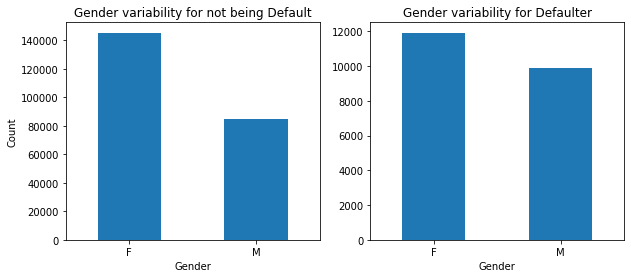

In [34]:
# Plotting for Gender Variable
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Gender variability for not being Default')
target0_set.CODE_GENDER.value_counts().plot.bar()
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.title('Gender variability for Defaulter')
target1_set.CODE_GENDER.value_counts().plot.bar()
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

It is clear from the above bar plot, that in both the cases of being defaulter or not being defaulter, the female category are higher than the male category. **But if we carefully look into the two dataset of male category the chances of being default in terms of repayment is litle bit of high. So finance company should keep this point in consideration in future.**

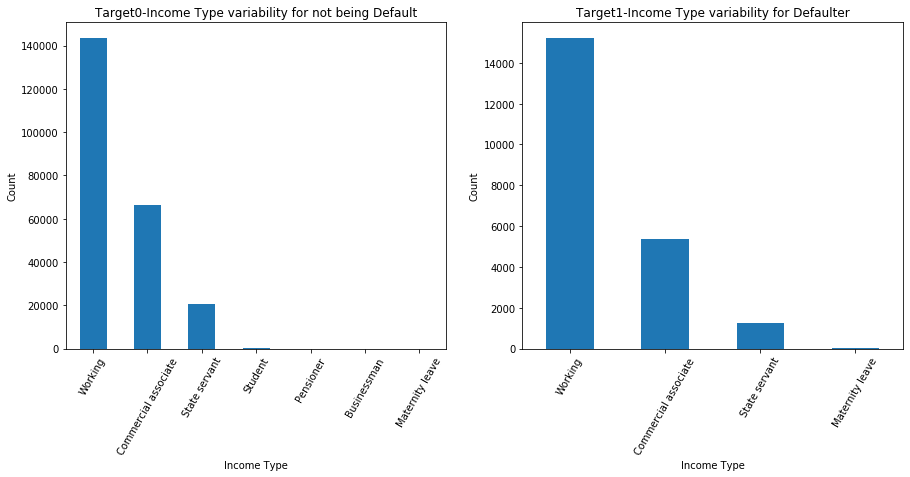

In [35]:
# Plotting for Income Type Variable
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Target0-Income Type variability for not being Default')
target0_set.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xlabel('Income Type')
plt.xticks(rotation=60)
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.title('Target1-Income Type variability for Defaulter')
target1_set.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xlabel('Income Type')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.show()

As it is seen from the graph that the number of working, commercial associate and state servant in Income Type variable are higher in both the dataset than student, businessman, pensioner and maternity leave. However the **State Servant** in **target0** dataset is little bit of higher than **target1** dataset. It is also observed that in **target1(Client with payment difficulty)** dataset there is no presence of **student, businessman and pensioner** class, it means they are very much well manner in terms of regular repayment. So finance company should keep more focus on these call specially businessman and pensioners.

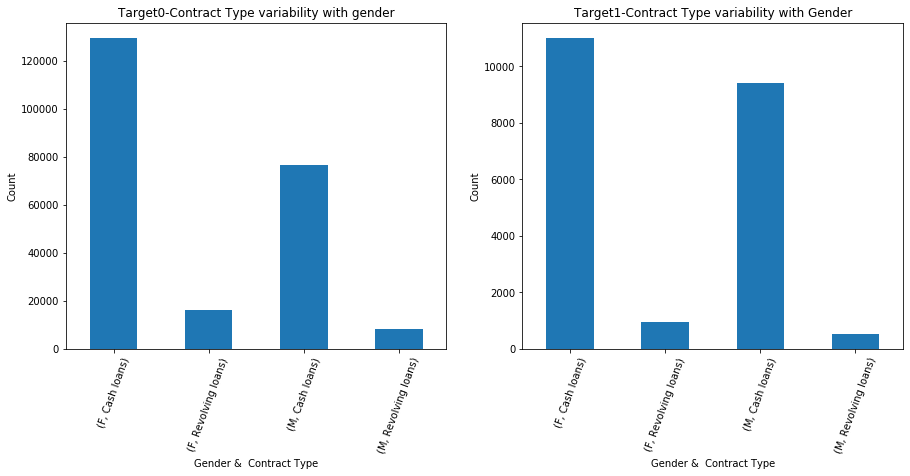

In [36]:
# Plotting for Contract Type Variable
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Target0-Contract Type variability with gender')
target0_set.groupby('CODE_GENDER')['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.xlabel('Gender &  Contract Type')
plt.xticks(rotation=70)
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.title('Target1-Contract Type variability with Gender')
target1_set.groupby('CODE_GENDER')['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.xlabel('Gender &  Contract Type')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.show()

In target0 dataset **cash loan** contract type is **higher** than the **Revolving loan** where as in target1 dataset these two type of contact are almost contemporary with each other. It is also observed that female are also ledding of applying for cash loan credit.

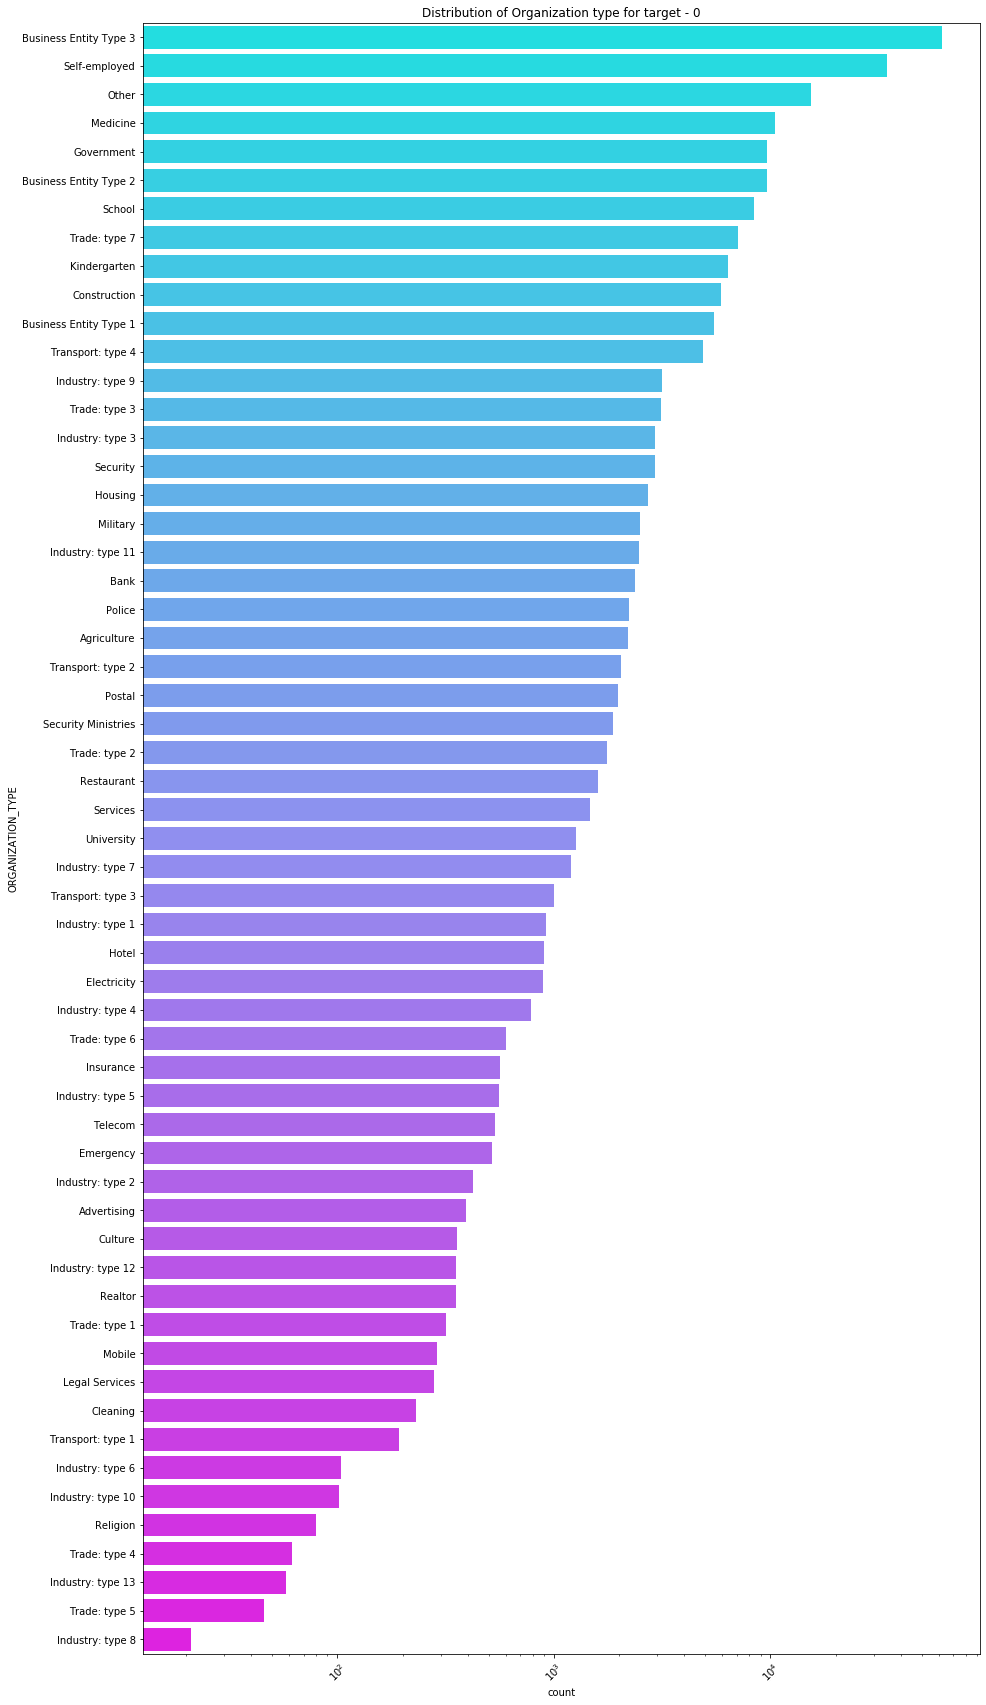

In [37]:
# Plotting for Organizatio Type Variable in logarithemic scale
plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target - 0")
plt.xticks(rotation=45)
plt.xscale('log')
sns.countplot(data=target0_set,y='ORGANIZATION_TYPE',order=target0_set['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()

Points to be Highlighted from the above graph.....

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

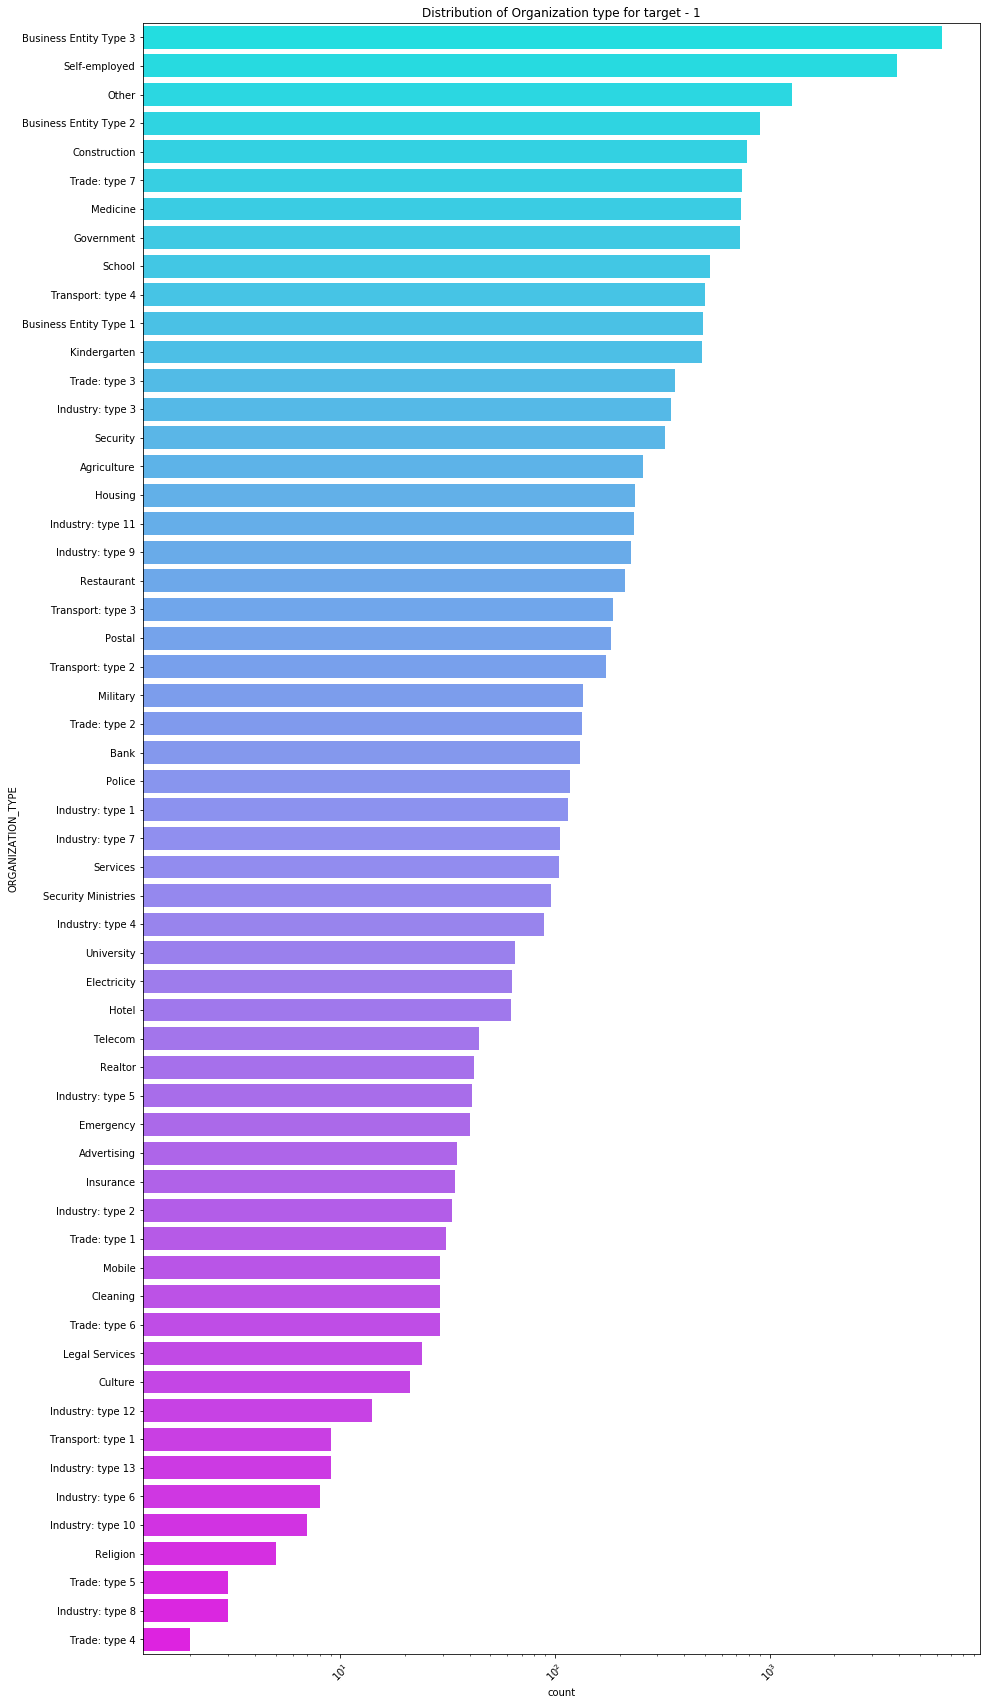

In [38]:
# Plotting for Organizatio Type Variable in logarithemic scale
plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target - 1")
plt.xticks(rotation=45)
plt.xscale('log')
sns.countplot(data=target1_set,y='ORGANIZATION_TYPE',order=target1_set['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()

Unlike target0 dataset, in target1 dataset also most of the loan applied from the business entity 3 and self-employed & others class of sectors. Rest of the sectors are subsiquently below these class of set of organization type. trade type 4 has the lowest number of credit where as in target0 dataset industry type 8 has the lowest number of credit.

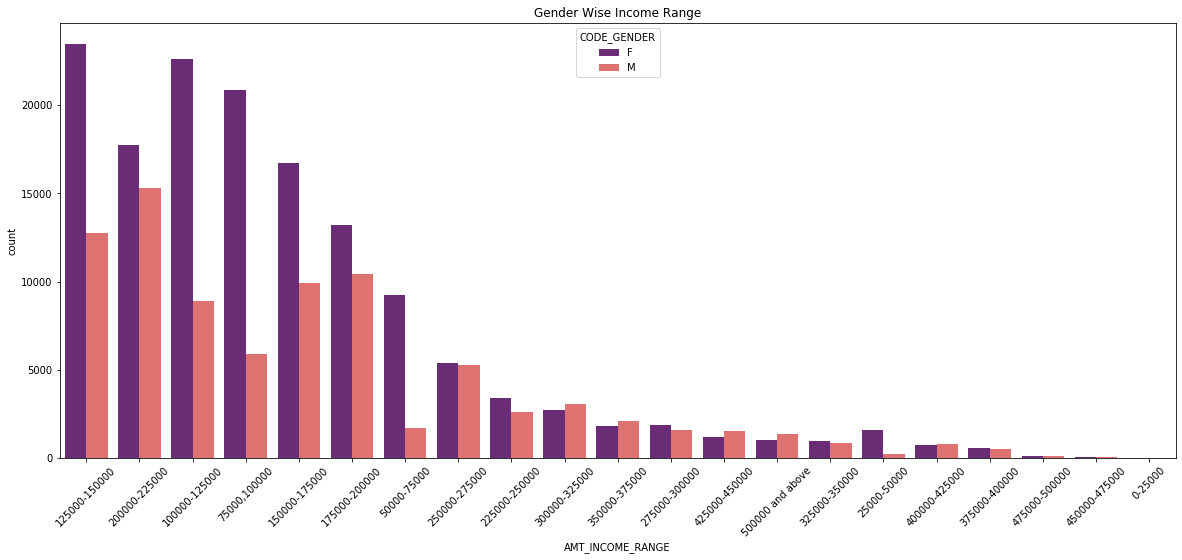

In [39]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.countplot(data=target0_set,x='AMT_INCOME_RANGE',order=target0_set['AMT_INCOME_RANGE'].value_counts().index,hue= 'CODE_GENDER',palette='magma')
plt.title('Gender Wise Income Range')
plt.show()

Female counts are higher than male. Income range from 100000 to 200000 is having more number of credits. This graph show that females are more than male in having credits for that range. Very less count for income range 400000 and above. And there is almost zero count for range 0-25000. It is also Notice that for income range 75000-100000 there is a huge difference for credit b/w male and female also for range 125000-150000.

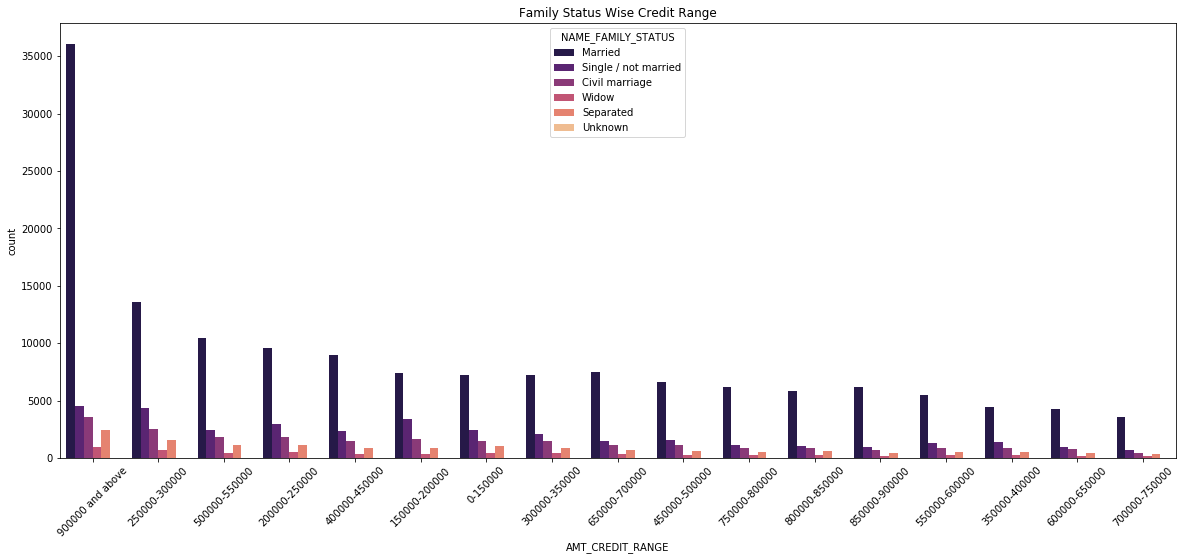

In [40]:

plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.countplot(data=target0_set,x='AMT_CREDIT_RANGE',order=target0_set['AMT_CREDIT_RANGE'].value_counts().index,hue= 'NAME_FAMILY_STATUS',palette='magma')
plt.title('Family Status Wise Credit Range')
plt.show()

It is seen from the above graph that most of the credits are lies in the Marriage class of "NAME_FAMILY_STATUS" variable. In credit range of 900000 and above, there are a huge number of credit has been issued to a perticular class of Marriage group. All other class in the FAMILY_STATUS variable are not in a state of comparison with the MARRIAGE class.

## Univariate Analysis for Numeric

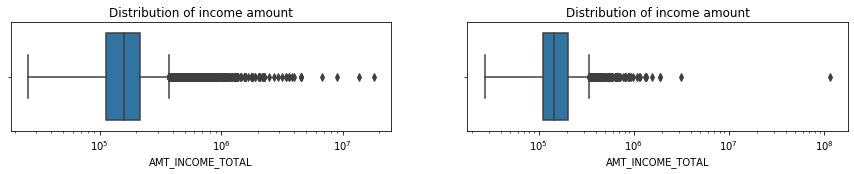

In [41]:
# Plotting boxplot for Income amount
plt.figure(figsize=(15,2))
plt.subplot(1,2,1)
plt.title('Distribution of income amount')
plt.xscale('log')
sns.boxplot(target0_set.AMT_INCOME_TOTAL,orient='h')

plt.subplot(1,2,2)
plt.title('Distribution of income amount')
plt.xscale('log')
sns.boxplot(target1_set.AMT_INCOME_TOTAL,orient='h')
plt.show()

Some outlier are seen in both the dataset. The third quartile is slim for Income amount. Most of the client of income group are present in the first quartile.

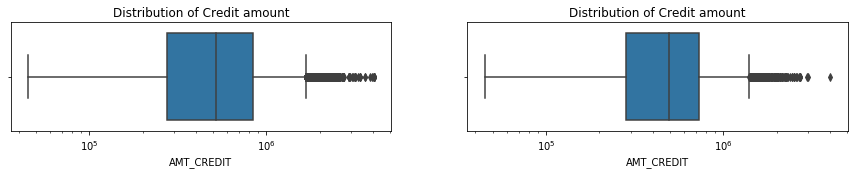

In [42]:
# Plotting boxplot for Credit amount
plt.figure(figsize=(15,2))
plt.subplot(1,2,1)
plt.title('Distribution of Credit amount')
plt.xscale('log')
sns.boxplot(target0_set.AMT_CREDIT,orient='h')

plt.subplot(1,2,2)
plt.title('Distribution of Credit amount')
plt.xscale('log')
sns.boxplot(target1_set.AMT_CREDIT,orient='h')
plt.show()

Some outlier are seen in both the dataset. The first quartile is bigger than the third quartile. It means that most of the credit for clients are present in the first quartile.

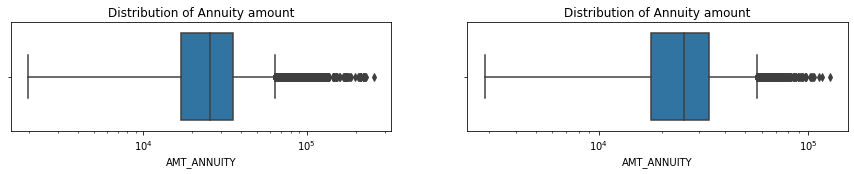

In [43]:
# Plotting boxplot for Annuity amount
plt.figure(figsize=(15,2))
plt.subplot(1,2,1)
plt.title('Distribution of Annuity amount')
plt.xscale('log')
sns.boxplot(target0_set.AMT_ANNUITY,orient='h')

plt.subplot(1,2,2)
plt.title('Distribution of Annuity amount')
plt.xscale('log')
sns.boxplot(target1_set.AMT_ANNUITY,orient='h')
plt.show()

Here is also outlier are seen, but they are not fur away from the body. Here is also first quartile is bigger than the third quartile, which means most of the annuity amout for clients are present in the first quartile.

### Bivariate Analysis for Numerical Variable

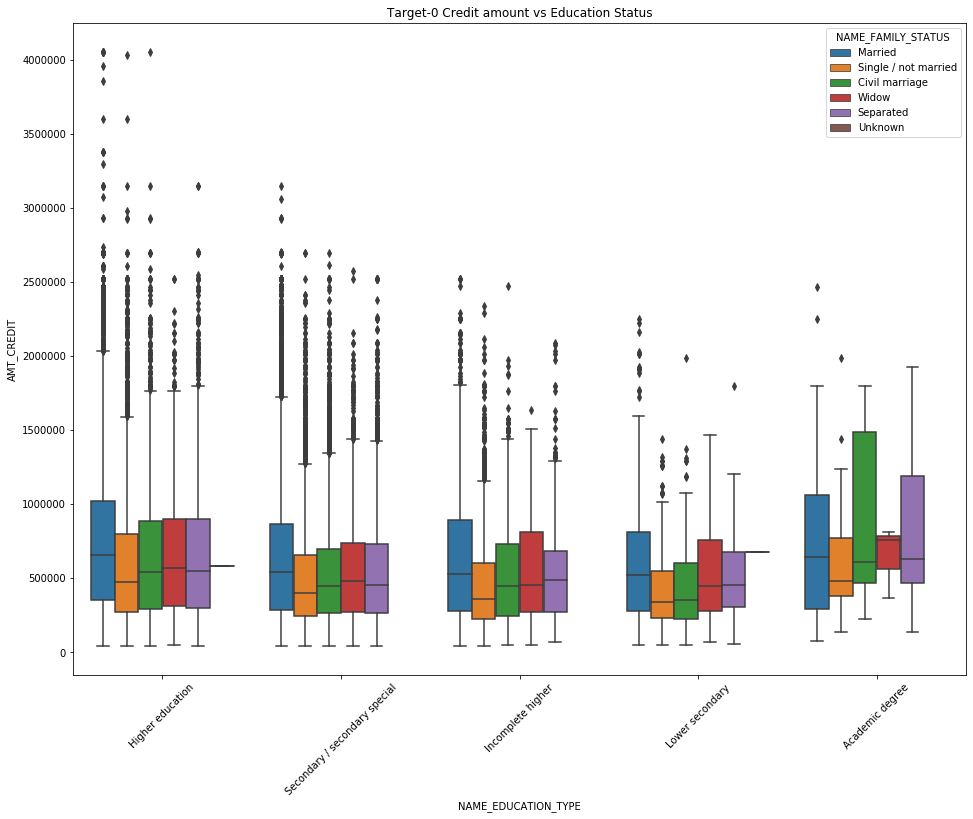

In [44]:
# Box plotting for Credit amount vs Education Status
# Target0
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_set, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Target-0 Credit amount vs Education Status')
plt.show()

1. In Academic Degree, **Higher credit is given to Married, Civil Marriage and Separated class under the FAMILY_STATUS category.** It is also seen that **most of the loan credit are lies in the 3rd quartile in Civil Marriage under the FAMILY_STATUS category** which Education has Academic Degree. 
2. In this Boxplot under the FAMILY_STATUS married class has the hugher number of loan credit irrespective of their Education Type. 
3. **The same interpretation We have also seen in the previous bar plot namely 'Family Status Wise Credit Range'(cell No- 39 ).**
4. Under the Higher Education there are lots of outlier for Married, Single and Civil Marriage class as what we have already seen in the same plot namely Family Status Wise Credit Range'.

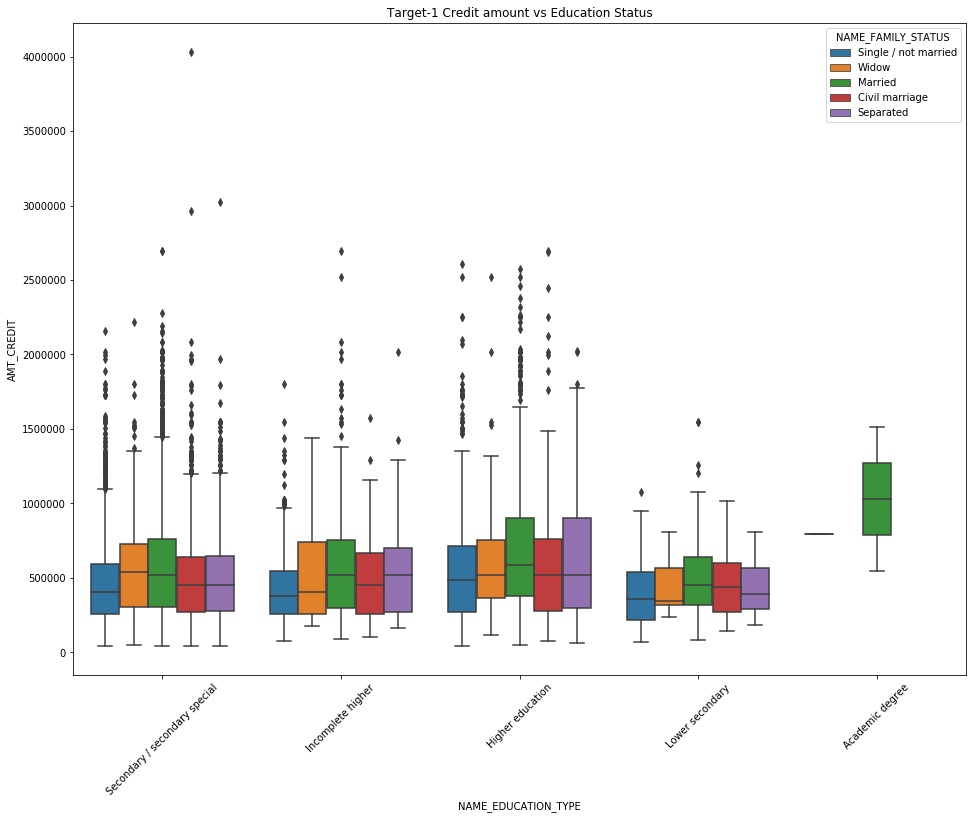

In [45]:
# Box plotting for Credit amount vs Education Status
# Target1
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_set, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Target-1 Credit amount vs Education Status')
plt.show()

1. Here, the Civil Marriage class of people has the higher amount of credit than others.
2. It is important to note that in Academic Degree only the Civil Marriage class of people are exits. **So from that we can say that in one scenario in contrast to credit amount as the Civil Marriage has higher credit side by side this class also has higher number of default case**.
3. Also in Secondary, Incomplete Higher, And Higher Education almost every class has outliers under the FAMILY_STATUS category. so we can say that finance company should keep that point in consideration before providing high number amount of loan to this class of people.

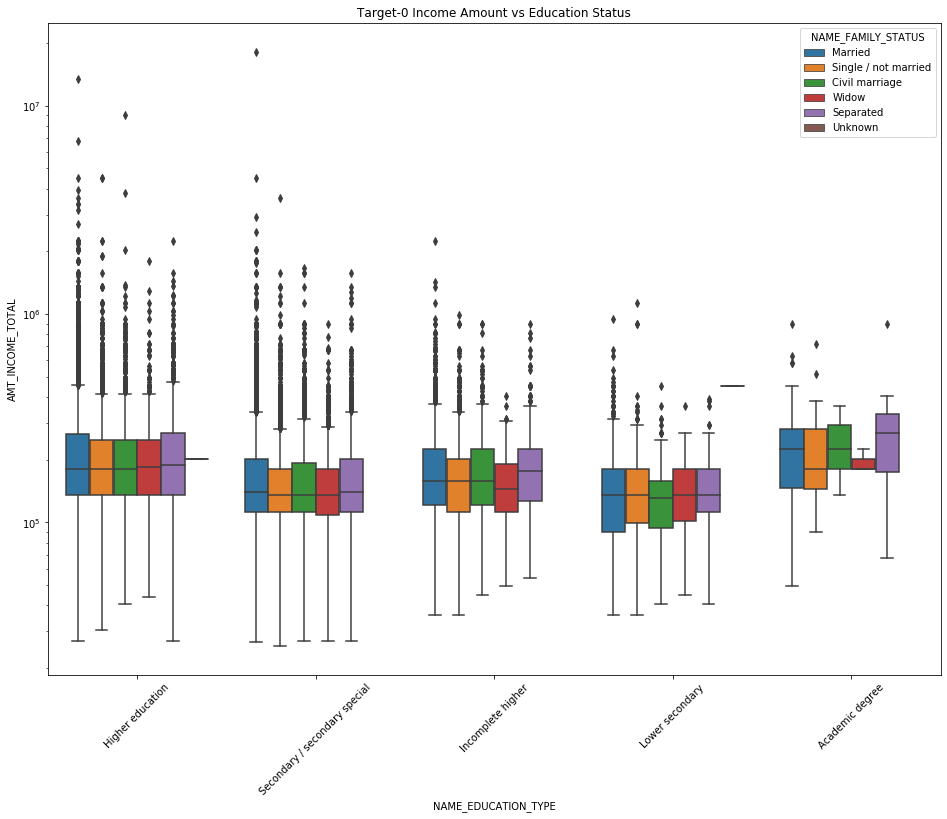

In [46]:
# Box plotting for Income Total vs Education Status
# Target0
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_set, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Target-0 Income Amount vs Education Status')
plt.show()

1. This plot basically represent that for **higher Education the income amount are almost similar with respect to Family Status.** Few outlier are seen all through the every Family Status Class. Which means some people has very high amount of Income from the average.
2. For Academic Degree, Income range for Married, Single and Separated are almost Same. **But this class for Education category are little bit of higher from other class of Education category. Most of the income for Married are lies in the 1st quartile, where as for Single class it lies in the 3rd quartile. And for separated class income amount also lies in the 1st quartile also.**
3. So it can be said from this plot that for the Academic categories the income structure are more rational than other class of Family Status.

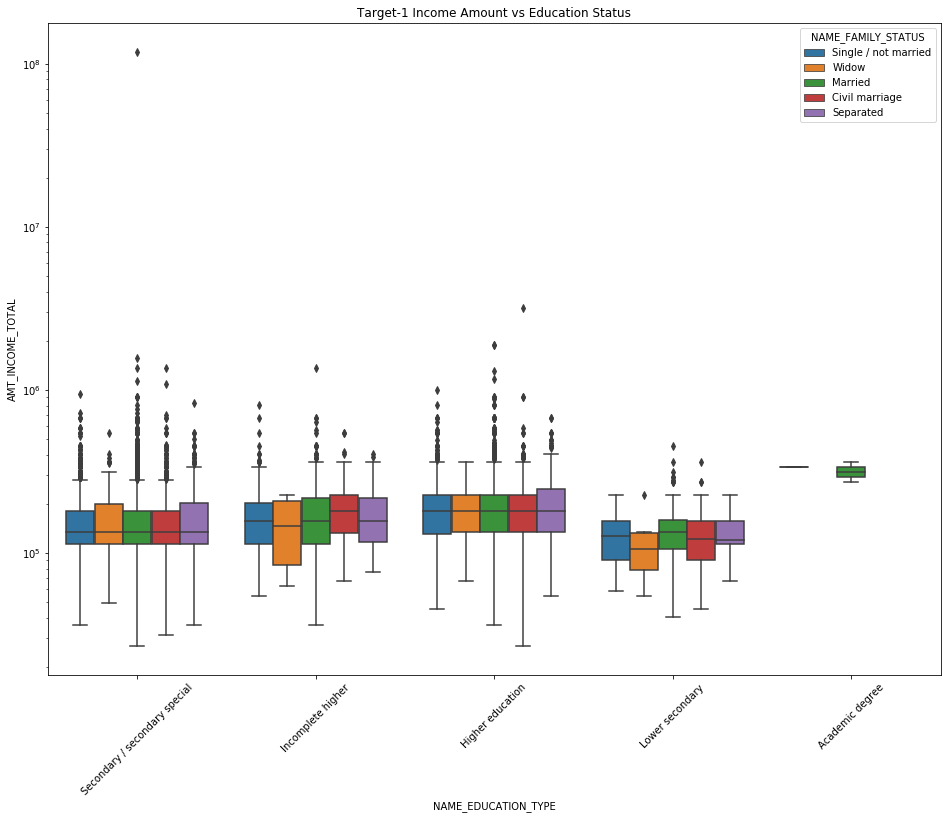

In [47]:
# Box plotting for Income Total vs Education Status
# Target1
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_set, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Target-1 Income Amount vs Education Status')
plt.show()

1. One outlier is seen for Married class under Family Status belongs to Secondary class under Education category, which means inspite of having high income he or she being default for loan repayment. We can consider that as an exceptional cases.
2. Aparently most of the class of Education category are more or less similar type of structure except Academic Degree and Lower Secondary.
3. **In Academic degree, only the Married class exits in moderate income range but in a low quantity.All other class are absent, Which indicate a very positive side that in future bank can do more focus on this particular Education Category for providing loans.**

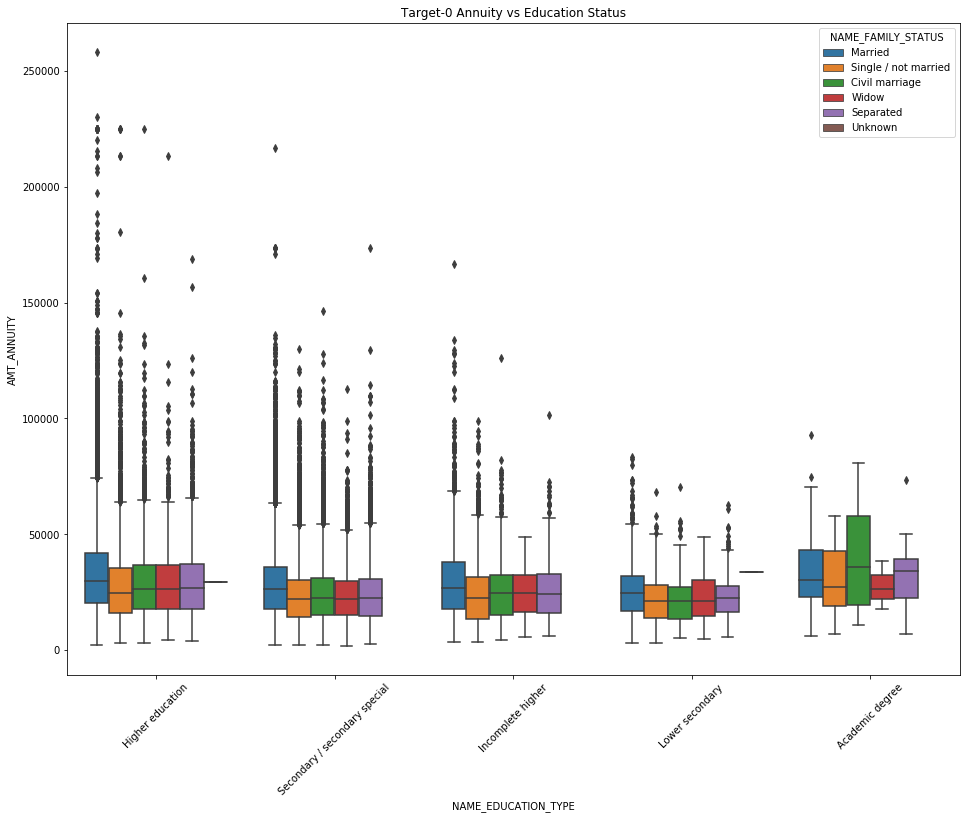

In [48]:
# Box plotting for Annuity vs Education Status
# Target0
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_set, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Target-0 Annuity vs Education Status')
plt.show()

1. Lots of outlier are seen for Higher Secondary and Secondary Special. Quartile range are almost similar for both the class.
2. For Academic Degree, Civil Marriage has high amount of annuity than all other class of Family Status. Most of the annuity are lies in the 3rd quartile.

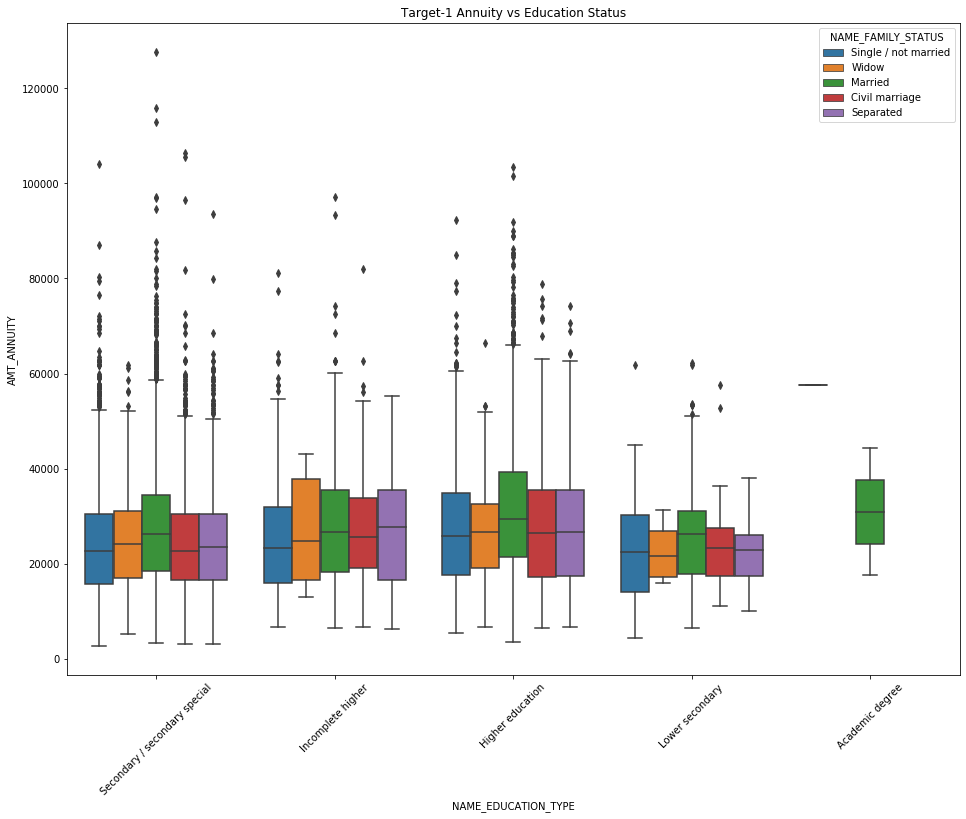

In [49]:
# Box plotting for Annuity vs Education Status
# Target1
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_set, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Target-1 Annuity vs Education Status')
plt.show()

1. Almost in every class of EDucation Categories there are moderate to high outlier seen except in Acedemic Degree.
2. **In Acedemic Degree, unilke comparison with credit amount there is also have a presense of only married class of family and others are absent which again is a very positive indication for this class of education category for bank.**
3. **Also it is seen that for Seceondary special class there is a very high range of outliers for Married class. If we look back our previous Bivarate analysis for 'target1_set', we can find that inspite of having high amount of annuity for high amount of credit this particular class has moderately low income, which leads them to become defaulter due to their income and credit imbalance. Finance Company should be careful in future for this particular class.**

In [50]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_set.iloc[0:,2:]
target1_corr=target1_set.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [51]:
target0.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.027052,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.408040,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.984033,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.823174,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
AMT_GOODS_PRICE,-0.027052,0.408040,0.984033,0.823174,1.000000,0.069793,-0.168821,-0.109273,-0.014991,-0.039750,0.045046,0.016769,0.043012,0.045777,-0.041907,-0.039530,-0.013186
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,0.069793,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.168821,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,-0.109273,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.014991,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.039750,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476


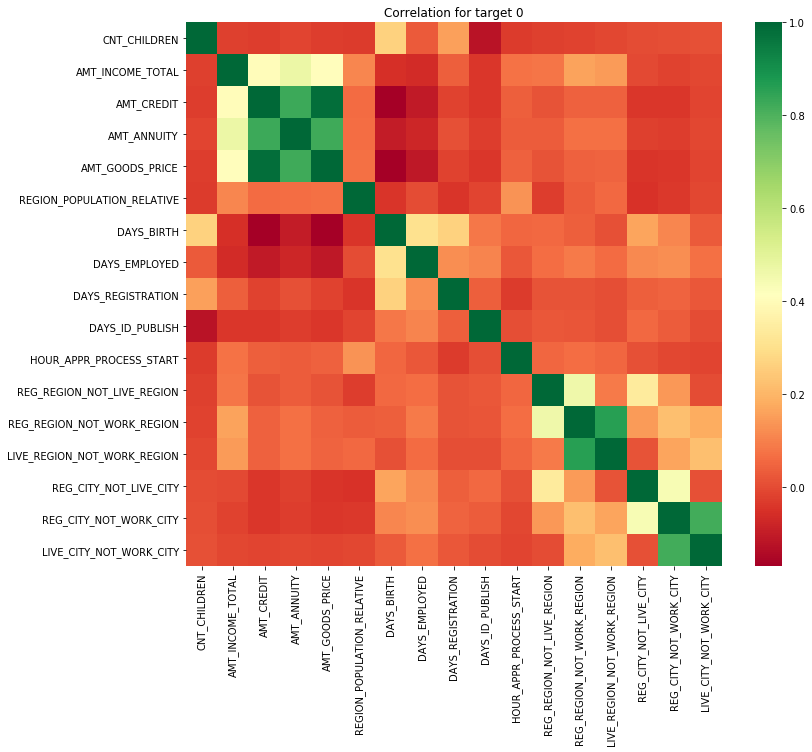

In [52]:
# Plotting heatmap for better visualization
plt.figure(figsize=(12,10))
sns.heatmap(data=target0, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 0')
plt.yticks(rotation=0)
plt.show()

As it is seen from the above Heatmap

1. Credit amount is inversely proportional to days_birth which means less the age has higher credit amount and vice-versa.
2. Credit amount is inversely proportional with number of children, means higher the children count have less amount of credit and vice-versa.
3. Income amount is also inversely proportional with count of children.
4. Less children count have found for densly populated area where as more children count have for less densely area.
5. Credit amount is higher for densely populated area and vice-versa,
6. Income amount is also high for densely populated area.

In [53]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.005770,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.368667,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.974837,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.804944,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
AMT_GOODS_PRICE,-0.005770,0.368667,0.974837,0.804944,1.000000,0.058228,-0.198841,-0.116109,-0.023071,-0.069116,0.037360,0.018389,0.036771,0.037990,-0.031782,-0.034261,-0.012346
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,0.058228,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.198841,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.116109,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.023071,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.069116,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598


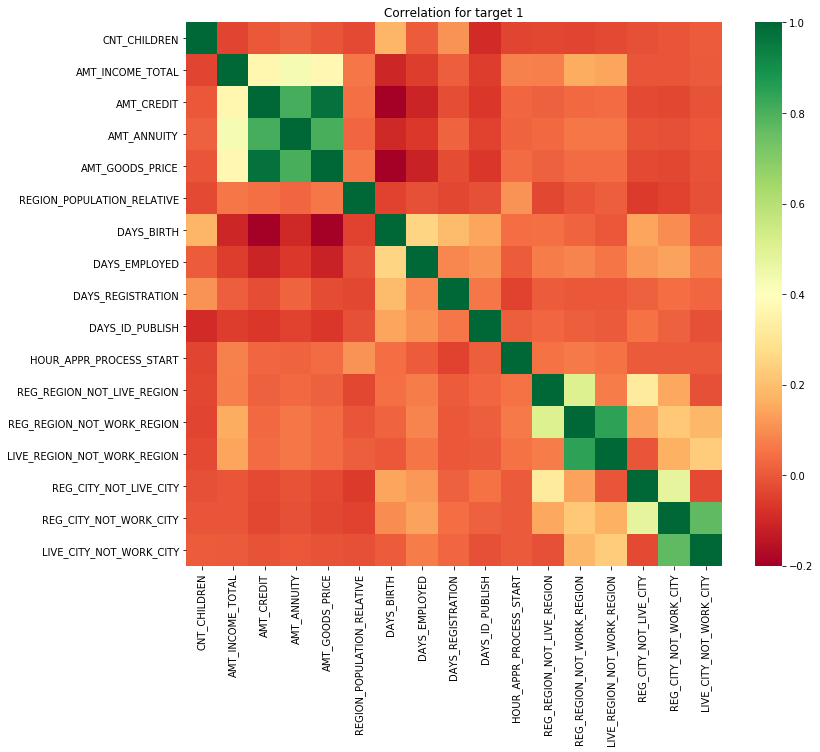

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(data=target1, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 1')
plt.yticks(rotation=0)
plt.show()

This heatmap is also quite similar with target0 dataset. Few changes are seen...

1. For those clients which permanent address are not matching with their contact address are having less children count and vice-versa.
2. For those clients which permanent address are not matching with their work address are also having less children count and vice-versa.

In [55]:
# Reading the another dataset.
pd.options.display.max_columns=50
pre_app_data = pd.read_csv(r'D:\Download folder\EDA case Study\previous_application.csv')
pre_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pre_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [57]:
# Counting Null Value
pre_app_data.isnull().sum()/len(pre_app_data.index)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [58]:
# Dropping column which has high null percentage as imputation of this column may lead inappropriate analysis.
unwanted_col= ['CNT_PAYMENT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING',
              'NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','NAME_TYPE_SUITE','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY',
              'RATE_INTEREST_PRIVILEGED']
pre_app_data.drop(labels=unwanted_col, axis=1, inplace=True)

In [59]:
pre_app_data.shape

(1670214, 23)

In [60]:
pre_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [61]:
pre_app_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [62]:
pre_app_data.loc[pre_app_data.NAME_CONTRACT_TYPE=='XNA', 'NAME_CONTRACT_TYPE']='Cash loans'

In [63]:
pre_app_data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [64]:
pre_app_data=pre_app_data.drop(pre_app_data[pre_app_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_app_data=pre_app_data.drop(pre_app_data[pre_app_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
pre_app_data.shape

(69635, 23)

In [65]:
pre_app_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        63835
XNA                                           5416
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

In [66]:
pre_app_data.loc[pre_app_data.NAME_PAYMENT_TYPE=='XNA', 'NAME_PAYMENT_TYPE']='Cash through the bank'

In [67]:
pre_app_data.drop('NAME_GOODS_CATEGORY', axis=1, inplace=True)

In [68]:
# Merging Two Dataset
merge_df = pd.merge(left=app_data, right=pre_app_data, how='inner', on='SK_ID_CURR')

In [69]:
merge_df.shape

(51420, 52)

In [70]:
pd.options.display.max_columns=52
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,THURSDAY,10,0,0,0,1,1,0,Self-employed,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low


In [71]:
# Removing unwanted columns for analysis

merge_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_y',
              'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

## Univariate Analysis for Merge Dataset

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(data=merge_df, x = 'NAME_CASH_LOAN_PURPOSE', order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS',palette='RdYlGn')
plt.yscale('log')
plt.title('Contract Status Distribution with Loan Purpose')
plt.xticks(rotation=90)
plt.show()

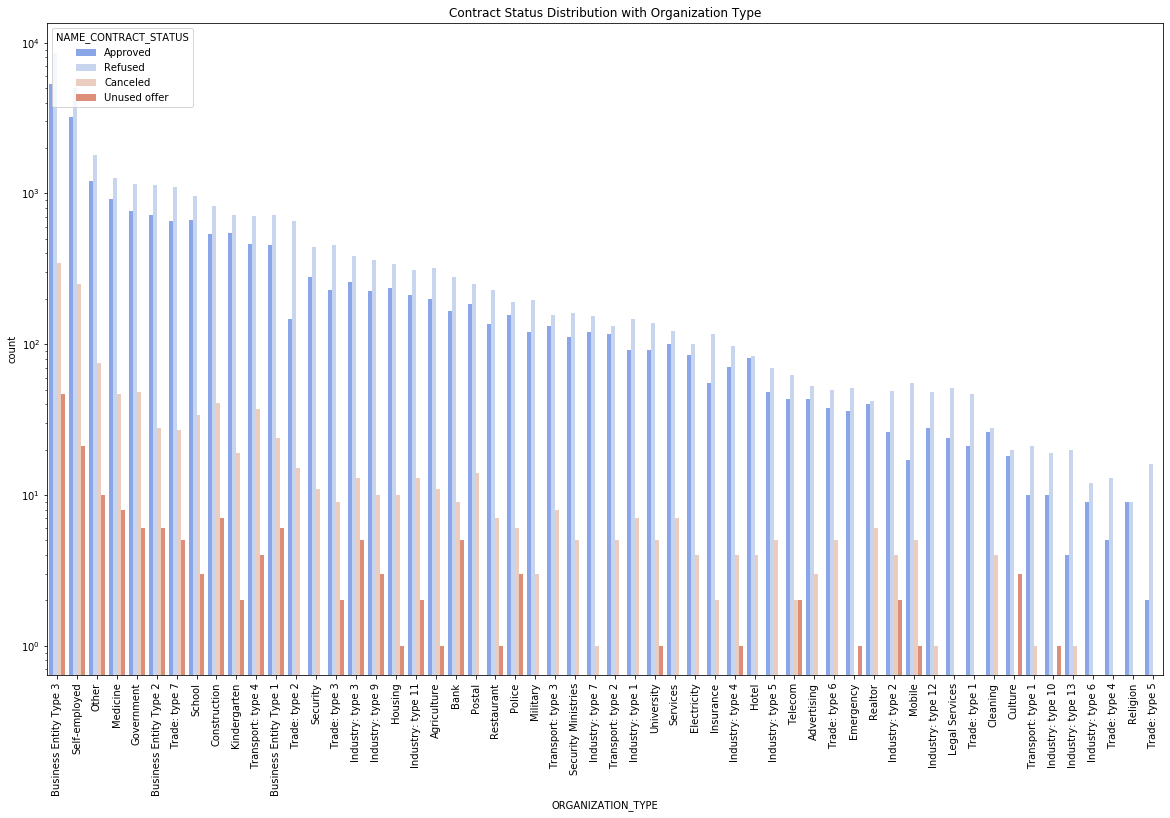

In [107]:
plt.figure(figsize=(20,12))
sns.countplot(data=merge_df, x = 'ORGANIZATION_TYPE', order=merge_df['ORGANIZATION_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS',palette='coolwarm')
plt.yscale('log')
plt.title('Contract Status Distribution with Organization Type')
plt.xticks(rotation=90)
plt.show()

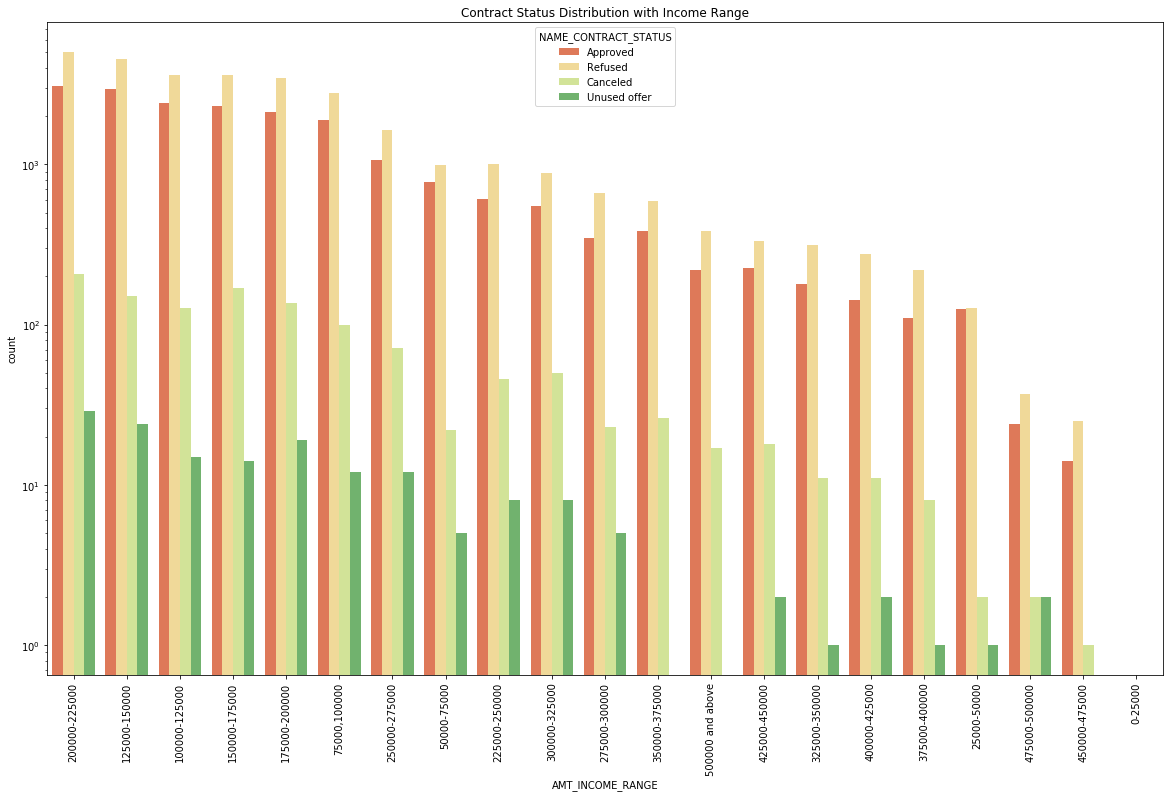

In [109]:
plt.figure(figsize=(20,12))
sns.countplot(data=merge_df, x = 'AMT_INCOME_RANGE', order=merge_df['AMT_INCOME_RANGE'].value_counts().index,hue='NAME_CONTRACT_STATUS',palette='RdYlGn')
plt.yscale('log')
plt.title('Contract Status Distribution with Income Range')
plt.xticks(rotation=90)
plt.show()

Facts That observed.....
1. From the first plot to this one for "Merge_df" dataset, it is clear that in all cases wherther it is Cash Loan Purpose or Organization Type or Income Range with contrast to Contract Status Type, Refusal is more high than Approval and other cases.
2. In the 1st plot of Merge_df Refusal of loan for Repair purpose is very high where as for "EveryDay Expenses, Medicin and Education" aprroval and refusal are almost equal. Along with, for purpose of "Repayment of other loan and buying a new car" has significantly high amount of refusal than approval.
3. In the 2nd plot, for Business Type-3 and Self Employed has very high amount of approval and rejection. Equally "Trade Type-2 and Trade Type-5" has significantly high amount of Rejection than approval. Also there are similar amount of approval and refusal for "Hotels, Realitor and Religion" class
4. For Income Range, as usual, refusal is greater than approval. But there is nothing any irrational distribution is seen b/w approval and rejection through out every income range except for range "25000-50000" where percentage of approval and rejection are almost equal.

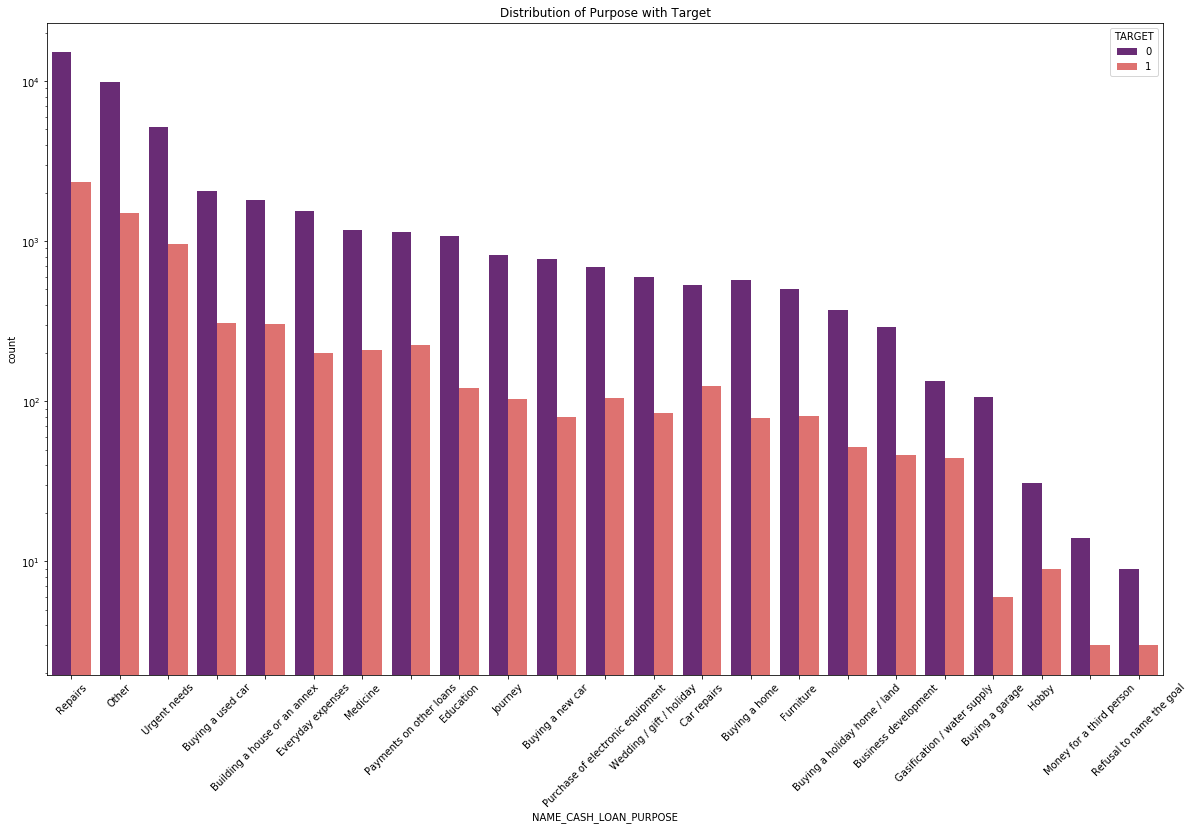

In [110]:
 plt.figure(figsize=(20,12))
sns.countplot(data=merge_df, x = 'NAME_CASH_LOAN_PURPOSE', order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='TARGET',palette='magma')
plt.yscale('log')
plt.title('Distribution of Purpose with Target')
plt.xticks(rotation=45)
plt.show()

1. Loan Purposes for "Repair" are having more difficulties for repayment on time.
2. It is also interesting that there are cases where loan repayment on time are very much high than facing difficulties like- "Buying a New Car, Buying Home, Buying Garage, Education, Buying land, Business Development".
3. Finance Company should keep this point in consideration of this type of purposes for future lending.

#### Bivariate Analysis

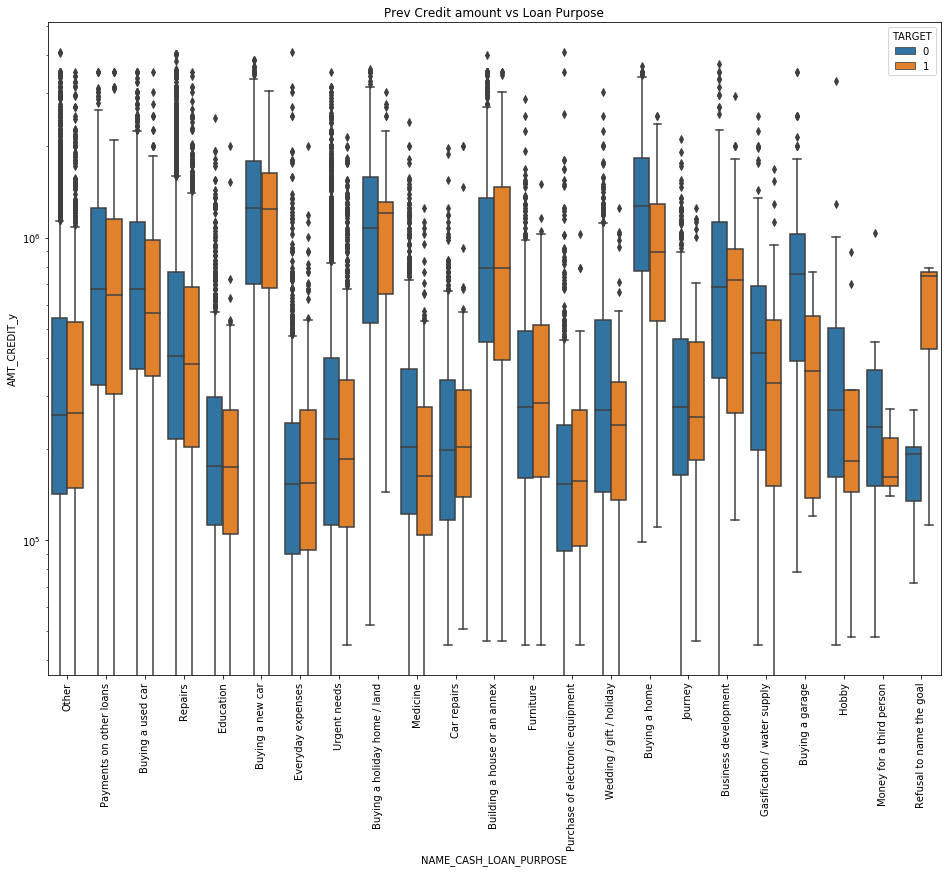

In [75]:
# Box plotting for Previous Credit amount vs Loan Purpose with respect to Target
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merge_df, x='NAME_CASH_LOAN_PURPOSE',hue='TARGET',y='AMT_CREDIT_y',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Observation are enclosed
1. Credit amount are very high for "Buying a home, Buying a new car, Buying a land, Building a house" for these purposes of loan. But inspite of having high credit for Building a House there is also defaulter percentage is moderately greater than the timely payment, which is also a contradictory matter.
2. It is also interesting that those who have take loan for Buying a Home, inspite of having high credit amount they are also time commitable for repayment, which we have seen in the last plot also.

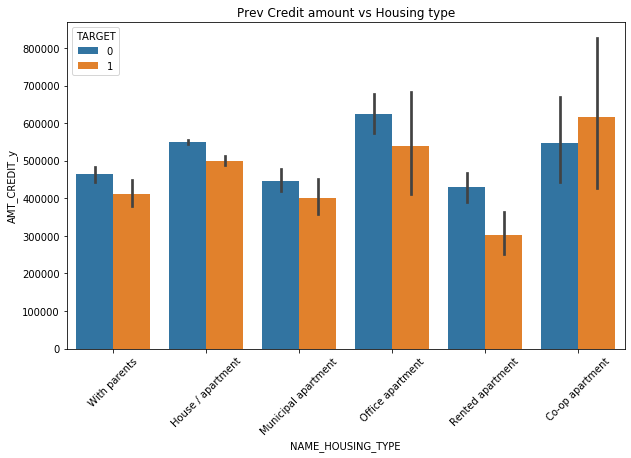

In [76]:
# Bar plotting for Previous Credit amount vs House Type with respect to Target
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data =merge_df, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of more timely payment workout where as co-op apartment is having higher credit but with more difficulties with repayment. So, we can conclude that finance company should avoid giving loans to the housing type of co-op apartment due to their difficulties in payment. Finance company can focus mostly on housing type like-with parents or House\appartment or miuncipal appartment for successful repayments.


## Conclusion Note:

1. **Consumer Finance Company should do more focus on Students, Pensioners, Businessman as their records are quite good for timely repayment. Also need to avoid the Working class as there is a high chance of difficulties.**
2. **Finance Company can do more focus on Academic Degree Education Type with respect to Family Status "Single/not Married" category as their defaulter record is significantly low.**
3. **Finance Company should avoid for providing loan for Repairing purpose, where as they can put more concentration on purpose of "Buying Home, Buying a New car, Education, Buying Garage, Business Development ect." as they have very good records of on time loan repayment.**
4. **Finance Company try to capture clients more from House type like - With Parents, House/Apartment, Municipal Apartments as they are more time bounded for loan repayment.**